# Code Challenge (Data Analyst)

Required libraries to solve the tasks

In [1]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from operator import itemgetter

In [2]:
station_json_path="/home/noor/Desktop/Task/stations.json"
crash_data_path='/home/noor/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv'

Read the crashes dataset 

In [3]:
df = pd.read_csv(crash_data_path)

/home/noor/anaconda2/envs/new_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Task 1 


In this task we need to find what is the most dangerous Borough for the Cyclists.
There are many concepts that could be taken into consideration to find if a borough is dangerous for cyclists or not.
One of these concepts is to see how many cyclists were killed or injured in the crushes that happened in this borough. I created a function that can visualize the borough according to another column in the dataset. 
Then I called this fucntion to visualize how many cyclists were killed in the crushes that happened in the borough then another call for how many cyclists were injured in the crushes that happened in the borough.


In [4]:
def cyclist_crashes_visualization(df, place, measure,subplot=False,plot=True):
    '''
    Finds the most dangerous borough/place in the dataset according to a specific measure (injured cyclist, killed cyclist ...) and visulaize the boroughes 
    by grouping the data in the dataframe using the bourgh/place and the sum of the measure values.
    
    Parameters
    ----------
        df : dataFrame
            Represents the crashes data.
        
        place : a string or a list of strings
            Represents the place/borough that we need to visualize the data based on
            
        measure : String
            Represents the columen name that we need to visulaize the place according to.
            
        subplot : boolean
            To visulalize the data in subplots or in one plot
        
        plot : boolean
            To visualize the data or not 
    Return
    ----------
        max_place : list of tupels of string
            Represents the index of the maximum sum of values in the measure column
        max_value : integer
            Represents the maximum sum of values in the measure column
    '''
    
    # remove nan values
    df.dropna()
    
    #Remove the lines that has 0 value in the measure column from the dataFrame
    new_df = df[df[measure] != 0]
    
    #Group the data using place and the sum of the values in the measure column
    place_measure_groups = new_df.groupby(place)[measure].agg('sum')

    #find the place that has the hightest sum of values in the measure column
    
    max_value = place_measure_groups.max()
    max_place = [key for key in place_measure_groups.keys() if max_value== place_measure_groups[key]]
    

    #plot
    if plot:
        if not subplot:
            place_measure_groups.plot(kind = 'bar')
        if subplot:
            groups = new_df.groupby(place[0])
            for key in groups.groups.keys():
                plt.figure(figsize = (25,6))
                g = groups.get_group(key).groupby(place[1:len(place)])[measure].agg('sum')
                plt.bar([str(k) for k in g.keys()],g.values)
                plt.xticks(rotation = 90)
                plt.title(key)
                plt.show()

            
    return max_place,max_value


According to sum the number of cyclist killed in the crashes, the Borough BROOKLYN is the most dangerous borough, It has the highest number of cyclist killed in the crashes: 42


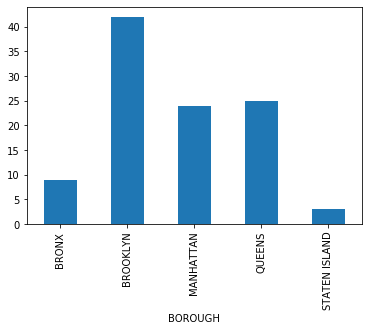

In [5]:
max_borough,max_value = cyclist_crashes_visualization(df,'BOROUGH', 'NUMBER OF CYCLIST KILLED') 
print('According to sum the number of cyclist killed in the crashes, the Borough %s is the most dangerous borough, It has the highest number of cyclist killed in the crashes: %s'%(' and '.join(max_borough), max_value))

According to sum the number of cyclist injured in the crashes, the Borough BROOKLYN is the most dangerous borough, It has the highest number of cyclist injured in the crashes: 10799


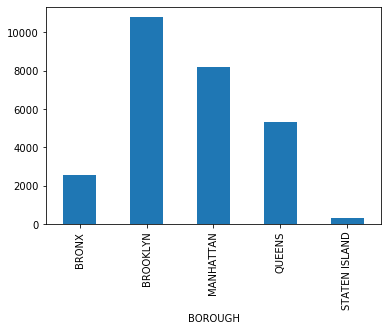

In [6]:
max_borough,max_value = cyclist_crashes_visualization(df,'BOROUGH', 'NUMBER OF CYCLIST INJURED') 
print('According to sum the number of cyclist injured in the crashes, the Borough %s is the most dangerous borough, It has the highest number of cyclist injured in the crashes: %s'%(' and '.join(max_borough), max_value))

To find the worst place to have a citybike station in, we need to define what do we mean of worst and how can we define a place.

# Task 2


First, we can define a place using the zip code, the borough name, the on street name, the cross street name, a coorinate of a point in the place, and so on ... 

If we took a coorinate of a point in the place then we are just thinking of one point of the place and when we want to think about a place to build in a station we would think about the area first is it suitable or not.
In this case we can take into consideration the zip code, the borough name and the on street name/the cross street name.

The worst place to build in a citybike station in could be defined as a dangerous place for the cyclists. In other words, it would be similar definiation as in task 1: the place where a cyclist got killed or injured in.


From the first task, we found that Borough BROOKLYN is the most dangerous borough for the cyclists, but it might not have the most dangerous place. we can find this out by visualizing the number of killed/injured cyclists using the borough an the zipcode.

We will start with the number of killed cyclists then we will have a look at the number of injured cyclists

we will use the same function written in task1 

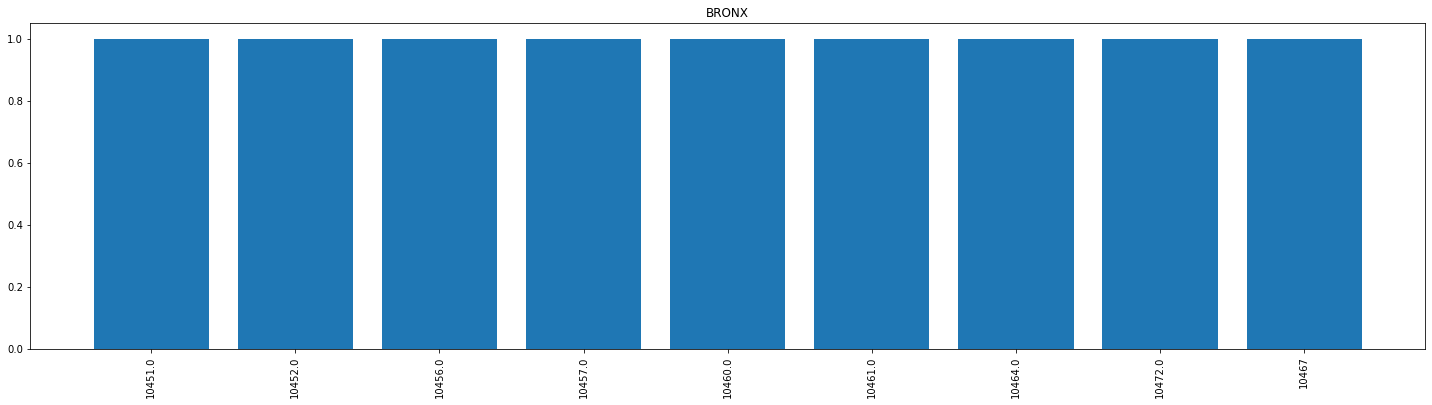

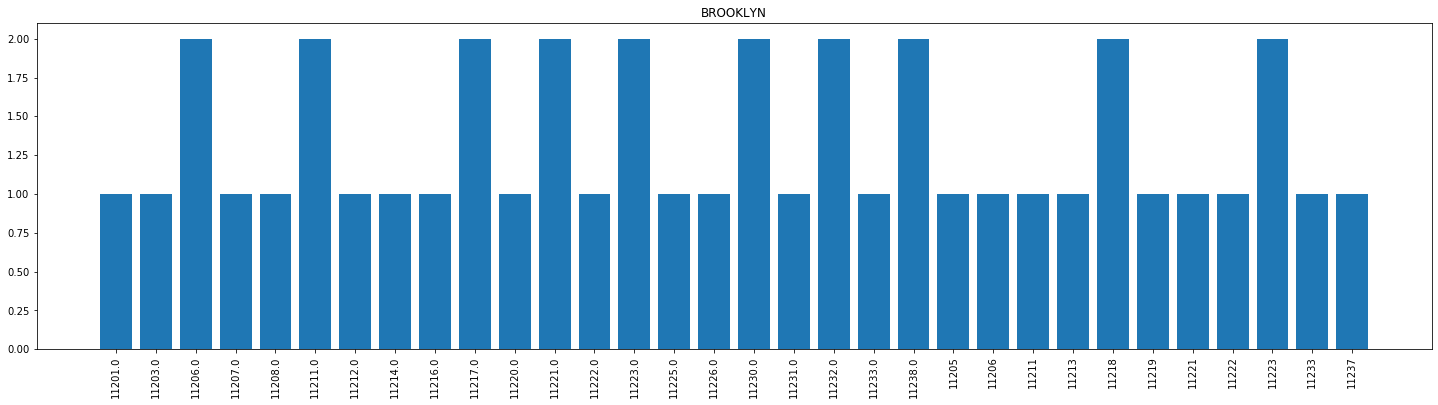

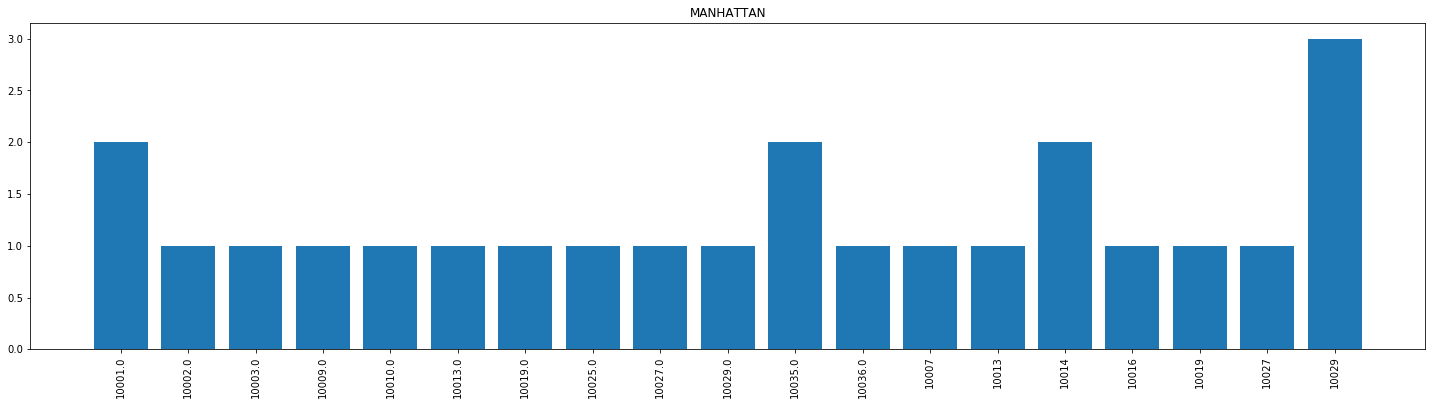

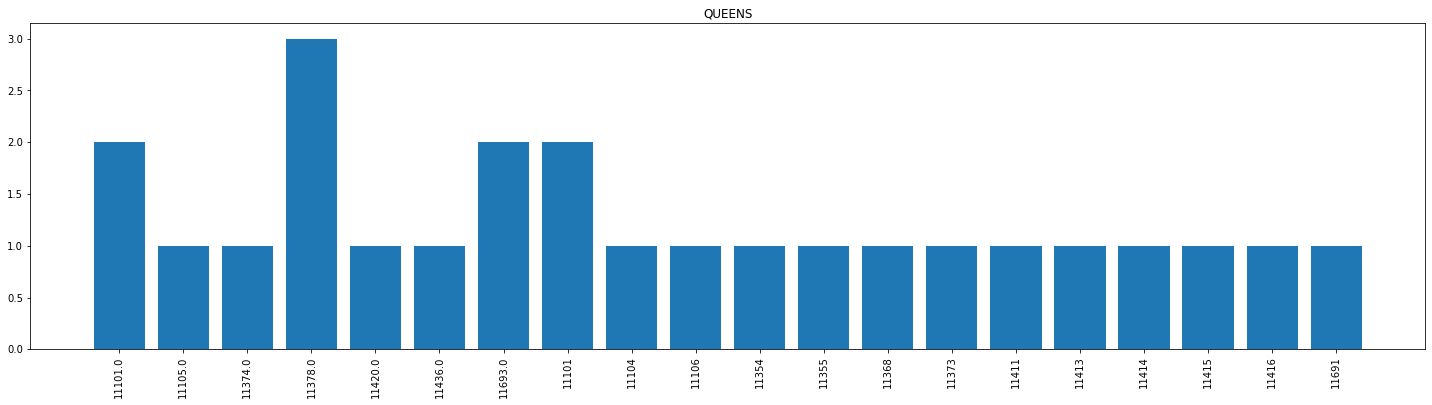

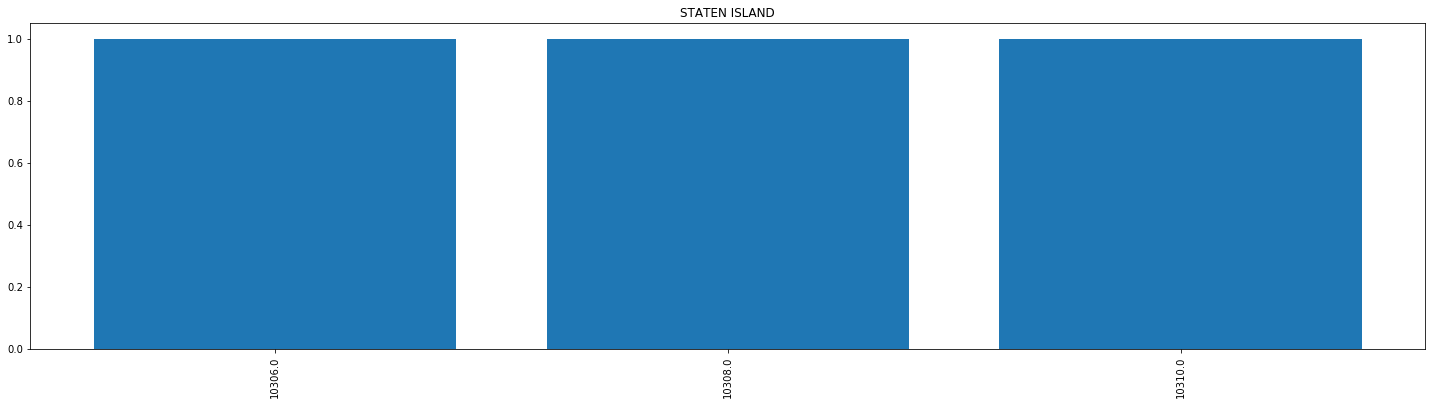

According to sum the number of cyclist killed in the crashes, (10029, MANHATTAN) and (11378.0, QUEENS) are the most dangerous areas to build a bike station in, they have the highest number of cyclist Killed in the crashes: 3


In [7]:
max_place_killed,max_value_killed = cyclist_crashes_visualization(df,['BOROUGH','ZIP CODE'], 'NUMBER OF CYCLIST KILLED',subplot=True) 
max_place_killed_print = ['(%s, %s)'%(zipCode,borough) for i ,(borough,zipCode) in enumerate(max_place_killed)]
print('According to sum the number of cyclist killed in the crashes, %s are the most dangerous areas to build a bike station in, they have the highest number of cyclist Killed in the crashes: %s'%(' and '.join(max_place_killed_print), max_value_killed))

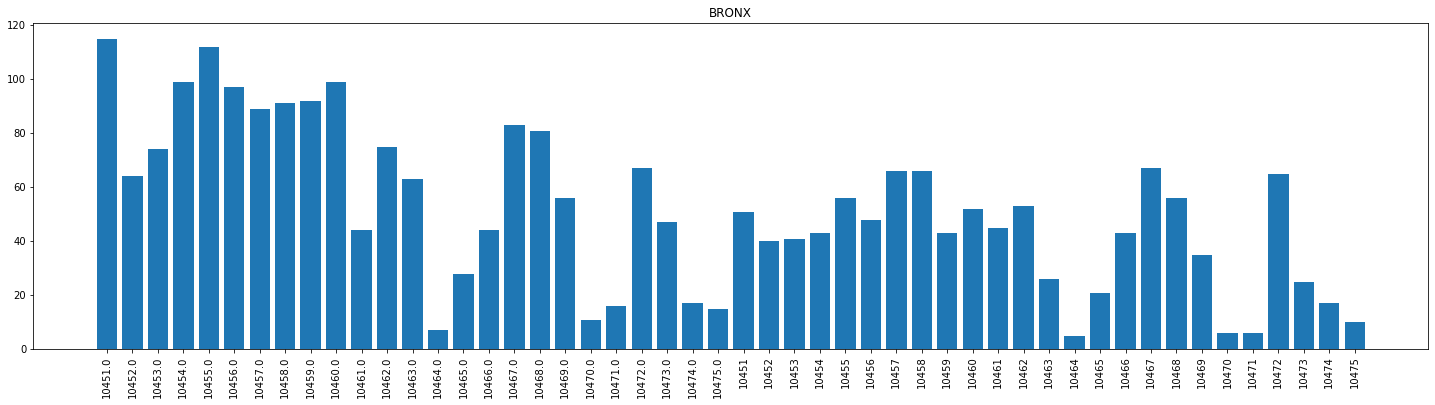

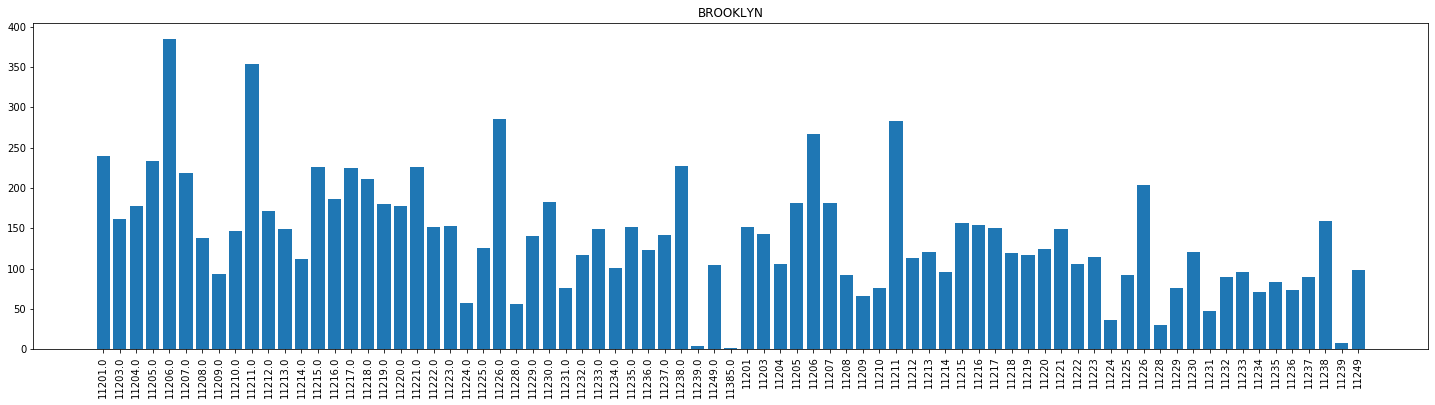

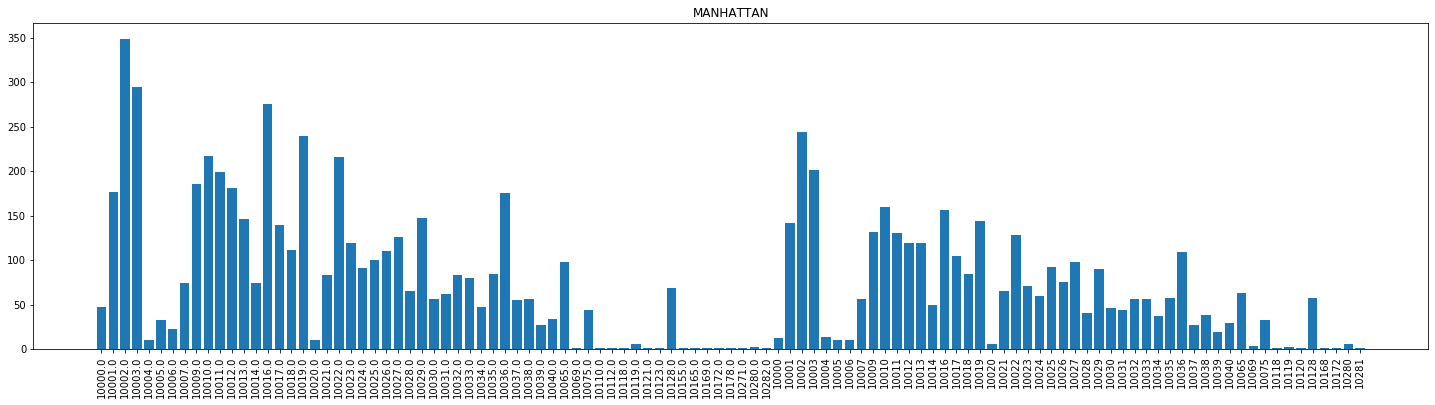

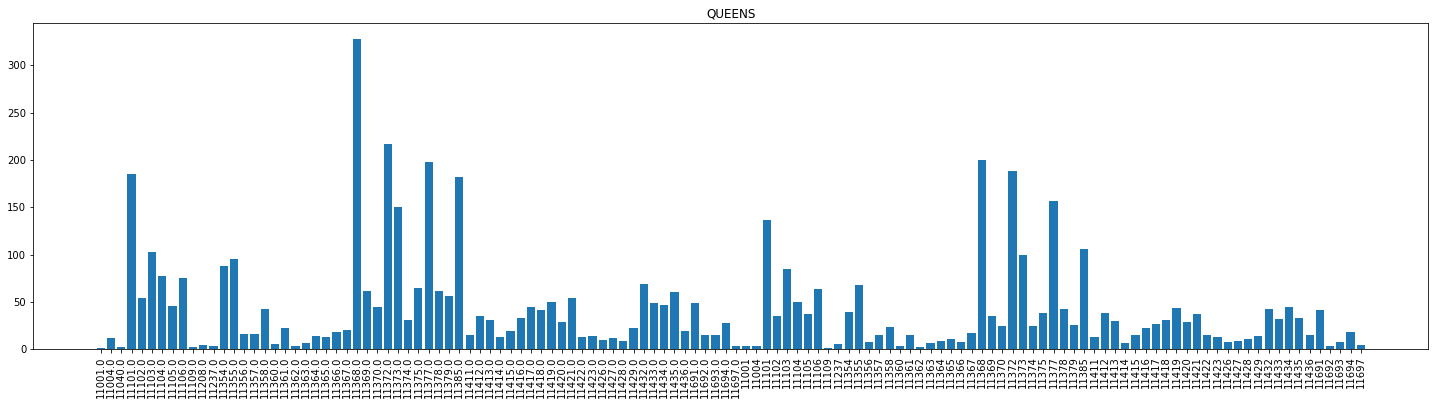

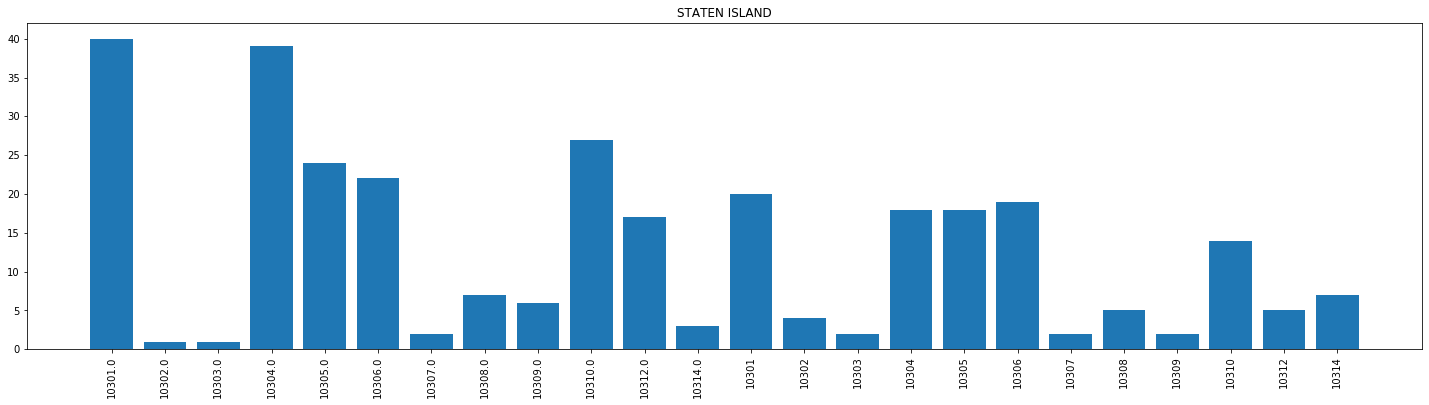

According to sum the number of cyclist injured in the crashes, (11206.0, BROOKLYN) is the most dangerous area to build a bike station in, it has the highest number of cyclist injured in the crashes: 385


In [8]:
max_place_injured,max_value_injured = cyclist_crashes_visualization(df,['BOROUGH','ZIP CODE'], 'NUMBER OF CYCLIST INJURED',subplot=True) 
max_place_injured_print = ['(%s, %s)'%(zipCode,borough) for i ,(borough,zipCode) in enumerate(max_place_injured)]
print('According to sum the number of cyclist injured in the crashes, %s is the most dangerous area to build a bike station in, it has the highest number of cyclist injured in the crashes: %s'%(' and '.join(max_place_injured_print), max_value_injured))

we can see that we got three area according to the borough and the zip code, so we need to find which one is more highly dangerous areas

we can see how many cyclist where injured in the areas that have the highest number of killed cyclist and compare it to the area that has the highest number of injured cyclists


In [9]:
injured_area = df[df['NUMBER OF CYCLIST INJURED'] != 0].groupby(['BOROUGH','ZIP CODE'])['NUMBER OF CYCLIST INJURED'].agg('sum')
for i in range(len(max_place_killed)):
    print("The number of injured cyclist in",max_place_killed_print[i], "is",injured_area[max_place_killed[i]])

The number of injured cyclist in (10029, MANHATTAN) is 90
The number of injured cyclist in (11378.0, QUEENS) is 62


we can also see how many cyclist where killed in the areas that have the highest number of injured cyclist and compare it to the areas that have the highest number of killed cyclists

In [10]:
killed_area = df[df['NUMBER OF CYCLIST KILLED'] != 0].groupby(['BOROUGH','ZIP CODE'])['NUMBER OF CYCLIST KILLED'].agg('sum')
for i in range(len(max_place_injured)):
    print("The number of killed cyclist in",max_place_injured_print[i],"is",killed_area[max_place_injured[i]])

The number of killed cyclist in (11206.0, BROOKLYN) is 2


According to both results, we can see that BROOKLYN is the most dangerous borough and (11206.0, BROOKLYN) is more dangerous area than the others.

To find the highly dangerous street, we can have a look at BROOKLYN crashes. 

In [11]:
max_place_killed_on,max_value_killed_on = cyclist_crashes_visualization(df,['ON STREET NAME','ZIP CODE','BOROUGH'], 'NUMBER OF CYCLIST KILLED',False,False) 
max_place_killed_on_print = ['(%s, %s, %s)'%(" ".join(on_st.split()),str(zipCode),borough) for i ,(on_st,zipCode,borough) in enumerate(max_place_killed_on)]
print('According to sum the number of cyclist killed in the crashes, %s are the most dangerous streets to build a bike station in, where the highest number of cyclist killed in the crashes: %s'%(' and '.join(max_place_killed_on_print), max_value_killed_on))

According to sum the number of cyclist killed in the crashes, (3 AVENUE, 11232.0, BROOKLYN) and (56 ROAD, 11378.0, QUEENS) and (BORDEN AVENUE, 11101.0, QUEENS) and (WEST STREET, 10014, MANHATTAN) are the most dangerous streets to build a bike station in, where the highest number of cyclist killed in the crashes: 2


In [12]:
max_place_injured_on,max_value_injured_on = cyclist_crashes_visualization(df,['ON STREET NAME','ZIP CODE','BOROUGH'], 'NUMBER OF CYCLIST INJURED',False,False) 
max_place_injured_on_print = ['(%s, %s, %s)'%(" ".join(on_st.split()),str(zipCode),borough) for i ,(on_st,zipCode,borough) in enumerate(max_place_injured_on)]
print('According to sum the number of cyclist injured in the crashes, %s is the most dangerous street to build a bike station in, where the highest number of cyclist injured in the crashes: %s'%(' and '.join(max_place_injured_on_print), max_value_injured_on))

According to sum the number of cyclist injured in the crashes, (GRAND STREET, 11211, BROOKLYN) is the most dangerous street to build a bike station in, where the highest number of cyclist injured in the crashes: 60


In [13]:
injured_street = df[df['NUMBER OF CYCLIST INJURED'] != 0].groupby(['ON STREET NAME','ZIP CODE','BOROUGH'])['NUMBER OF CYCLIST INJURED'].agg('sum')
for i in range(len(max_place_killed_on)):
    if max_place_killed_on[i] in injured_street.keys():
        print("The number of injured cyclist in",max_place_killed_on_print[i], "is",injured_street[max_place_killed_on[i]])
    else:
        print("No cyclist was injured in",max_place_killed_on_print[i])

The number of injured cyclist in (3 AVENUE, 11232.0, BROOKLYN) is 9
The number of injured cyclist in (56 ROAD, 11378.0, QUEENS) is 3
The number of injured cyclist in (BORDEN AVENUE, 11101.0, QUEENS) is 4
The number of injured cyclist in (WEST STREET, 10014, MANHATTAN) is 2


In [14]:
killed_street = df[df['NUMBER OF CYCLIST KILLED'] != 0].groupby(['ON STREET NAME','ZIP CODE','BOROUGH'])['NUMBER OF CYCLIST KILLED'].agg('sum')
for i in range(len(max_place_injured_on)):
    if max_place_injured_on[i] in killed_street.keys():
        print("The number of killed cyclist in",max_place_injured_on_print[i],"is",killed_street[max_place_injured_on[i]])
    else:
        print("No cyclist was killed in the crashes in",max_place_injured_on_print[i])

No cyclist was killed in the crashes in (GRAND STREET, 11211, BROOKLYN)


From the previous analysis we can see that:

1- there are 5 streets that could be considered as dangerous streets to build a citybike in while it differ in the level of dangerousness
    

2- There is one area that is cocedered as dangerous area (11206.0, BROOKLYN)

# Task 3

The crashes dataset doesn't have any information about the stations, which means we need to read the stations dataset, we also need a function that can calculate the distacne between two coordinates, we need a function to preprocess to train a model.

In [15]:
def stations_coordinates(path):
    '''
    read the stations data and return a sorted list of stations according to the coordinatwes. 
    
    Prameters
    ----------
    path : string
        the path of the json file contains the stations data
    
    Return
    ----------
    stations_coordinates_sorted : list of lists
        a list of sorted stations according to the corrdinates
    '''
    
    # read the stations data
    with open(path, 'r') as fin:
        stations = json.load(fin)
        fin.close()
        
        
    stationBeanList = stations["stationBeanList"]
    stations_coordinates = []
    # take the needed information 
    for station in stationBeanList:
        stations_coordinates.append([station['stationName'], round(station['latitude'], 5), 
                                     round(station['longitude'], 5)])
        
    # order the station according to the latitude then longitude then the station name
    stations_coordinates_sorted = sorted(stations_coordinates, key=itemgetter(2,0,1))
    
    return stations_coordinates_sorted


In [16]:
def lonLatDistance(point1,point2):
    '''
    Function to calculate the distance between two coordinates
    
    Parameters
    ----------
    point1: (float, float)
        The first coordinate point
    point2: (float, float)
        The second coordinate point
    
    Return
    ----------
    Distance between the two points 
    
    '''
    R = 6373.0 # approximate radius of earth in km
    lat1 = float(point1[0])
    lon1 = float(point1[1])
    lat2 = float(point2[0])
    lon2 = float(point2[1])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

The dataset doesn't contain any safe places where no craches happened. Since our focus is on the cyclists in the city and the citybike stations, any crash that didn't kill or injured a cyclist will be considered as a safe area/street/place for the cyclists

To train the model, I will use crash time, borough, zip code, on street name, longitude, latitiude, contribution factor 1,2,3,4, and 5, vehical type 1,2,3,4, and 5, and the time . 

In [17]:
def data_preprocessing(df):
    '''
    This function preprocess the data and prpare oit to train the prediction model
    
    Parameters
    ----------
    df: dataframe 
        contains the data 
    
    Return
    ----------
    featurs : array 
        contains the features that are going top ne used as a n input to the machine learning algorithm.
    labels : list of binary values
        represents the related output to the features in the feature array
    classes : dict
        dictionary that has the mapping values of the encoded values from the column in the dataframe
    
    '''
    
    # remove the rows that contain nan values in the longitude and the latitude columens
    df_copy = df[pd.notnull(df['LONGITUDE'])]
    df_copy = df_copy[pd.notnull(df_copy['LATITUDE'])]
    
    classes={}
    # to encode the data
    le = preprocessing.LabelEncoder()
    
    # encode the borough name, the on street name, the 
    borough_encoded = le.fit_transform(list(df_copy['BOROUGH']))
    classes['BOROUGH']=dict(zip(le.transform(le.classes_),le.classes_))
    
    zipCode_encoded = le.fit_transform(list(df_copy['ZIP CODE']))
    classes['ZIP CODE']=dict(zip(le.transform(le.classes_),le.classes_))
    
    onStreetName_encoded = le.fit_transform(list(df_copy['ON STREET NAME']))
    classes['ON STREET NAME'] = dict(zip(le.transform(le.classes_),le.classes_))

    
    # prepare the lonitude and the latitude
    lon_list = list(df_copy['LONGITUDE'].round(5))
    lat_list = list(df_copy['LATITUDE'].round(5))
    
    # find the list of the contribution factors in 5 columns 
    contribution_factors_list = list(set(list(df_copy['CONTRIBUTING FACTOR VEHICLE 1']) + 
                                         list(df_copy['CONTRIBUTING FACTOR VEHICLE 2']) + 
                                         list(df_copy['CONTRIBUTING FACTOR VEHICLE 3']) +
                                         list(df_copy['CONTRIBUTING FACTOR VEHICLE 4']) + 
                                         list(df_copy['CONTRIBUTING FACTOR VEHICLE 5'])))
    
    # encode the contribution factors columen in the dataframe according the index of 
    # the contribution factor in the contribution list 
    Cont_1_encoded = [contribution_factors_list.index(i) for i in df_copy['CONTRIBUTING FACTOR VEHICLE 1']]
    Cont_2_encoded = [contribution_factors_list.index(i) for i in df_copy['CONTRIBUTING FACTOR VEHICLE 2']]
    Cont_3_encoded = [contribution_factors_list.index(i) for i in df_copy['CONTRIBUTING FACTOR VEHICLE 3']]
    Cont_4_encoded = [contribution_factors_list.index(i) for i in df_copy['CONTRIBUTING FACTOR VEHICLE 4']]
    Cont_5_encoded = [contribution_factors_list.index(i) for i in df_copy['CONTRIBUTING FACTOR VEHICLE 5']]
    
    classes['CONTRIBUTING FACTOR'] = {i:contribution_factors_list[i] for i in range(len(contribution_factors_list))}
    
    
    # find the list of the vehical type in 5 columns 
    vehical_type_list = list(set(list(df_copy['VEHICLE TYPE CODE 1']) + 
                                 list(df_copy['VEHICLE TYPE CODE 2']) + 
                                 list(df_copy['VEHICLE TYPE CODE 3']) +
                                 list(df_copy['VEHICLE TYPE CODE 4']) + 
                                 list(df_copy['VEHICLE TYPE CODE 5'])))
    
    # encode the vehical type columen in the dataframe according the index of 
    # the vehical type in the vehical type list 
    vehical_1_encoded = [vehical_type_list.index(i) for i in df_copy['VEHICLE TYPE CODE 1']]
    vehical_2_encoded = [vehical_type_list.index(i) for i in df_copy['VEHICLE TYPE CODE 2']]
    vehical_3_encoded = [vehical_type_list.index(i) for i in df_copy['VEHICLE TYPE CODE 3']]
    vehical_4_encoded = [vehical_type_list.index(i)for i in df_copy['VEHICLE TYPE CODE 4']]
    vehical_5_encoded = [vehical_type_list.index(i) for i in df_copy['VEHICLE TYPE CODE 5']]
    
    
    classes['VEHICLE TYPE'] = {i:vehical_type_list[i] for i in range(len(vehical_type_list))}

    # extract the minute from the time column 
    minutes = [datetime.strptime(x, '%H:%M').time().minute for x in df_copy['CRASH TIME']]
    
    # extract the hours from the time column
    hours = [datetime.strptime(x, '%H:%M').time().hour for x in df_copy['CRASH TIME']]
    
    # combine the number of likked cyclits and the number of injured cyclist in one column by summing them
    sum_killed_injured = df_copy['NUMBER OF CYCLIST KILLED']+df_copy['NUMBER OF CYCLIST INJURED']
    
    # the features that are going to be used to train the model
    features = np.column_stack((borough_encoded, zipCode_encoded, onStreetName_encoded, 
                            lat_list,lon_list,
                            Cont_1_encoded,Cont_2_encoded,Cont_3_encoded,Cont_4_encoded,Cont_5_encoded,
                            vehical_1_encoded,vehical_2_encoded,vehical_3_encoded,vehical_4_encoded,vehical_5_encoded,
                            hours, minutes))
    
    # the labels that are going to be used to train the model
    label = [x if x == 0 else 1 for x in sum_killed_injured]
    
    return features, label,classes
    
    

Prepare the data and split it into 70% training and 30% testing 

In [18]:
# preprocess the data 
features, label, classes= data_preprocessing(df)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3,random_state = 109) # 70% training and 30% test

Create and train a random forest classifier and generate the prediction on the test dataset

In [19]:
#Create a Random Forest classifier 
model = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
model.fit(X_train,y_train)

# Generate the result of prediction from the moel on the test dataset 
y_pred = model.predict(X_test)

Evalaute the model by calculating the accuracy of the model 

In [20]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('CLassification report')
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.9922370252170584
CLassification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    426770
           1       0.78      0.89      0.83      9403

    accuracy                           0.99    436173
   macro avg       0.89      0.94      0.91    436173
weighted avg       0.99      0.99      0.99    436173



The number of the available noncrash data according to the numbe rof killed ansd injured cyclist is more than the crash data, This might cause some problms in predicting the crashes and this also didn't let the model learn enough to predict if there is a crash will happen or not.  

After we built a model to predict if there is a crash that could be dangerous for the cyclist or not we can see what is the closest bike station to the crashes.

In [21]:
def find_nearest_station(station_coordinates,crash_point_lat,crash_point_lon):
    '''
    This function finds the closest station to a crash 
    
    Parameters
    ----------
    station_coordinates : list of lists
        list of stations name and coordinate
    crash_point_lat: float 
        the latitiude of the crash coordinate
    crash_point_lon: float 
        the longitude of the crash coordinate

    '''
    # see if the crash happend exactly at any station 
    res1 = [i for i, station in enumerate(station_coordinates) if crash_point_lat in station]
    res2 = [i for i, station in enumerate(station_coordinates) if crash_point_lon in station]
    crashInStation = list(set(res1) & set(res2))
    # see if the crash happend exactly at any station 
    if len(crashInStation) > 0:
        print("The crash will happen exactly in %s bike station" %station_coordinates[crashInStation[0]])
    else:
        #find the closest station 
        distance_station = [lonLatDistance([station[1],station[2]],[crash_point_lat,crash_point_lon]) for station in station_coordinates]
        min_distance_Idx = distance_station.index(np.min(distance_station))
        print("station:",station_coordinates[min_distance_Idx][0],"is the closest citybike station to the crash with a distance is %.2fkm."%distance_station[min_distance_Idx])

            
    

In [22]:
stations_coordinates_sorted = stations_coordinates(station_json_path)   

Now, for 10 examples from the test dataset that our model predicted to have a crash in we will give some information about the place and the nearest bike station  

In [23]:
num=0
for i in range(len(y_pred)):
    x = X_test[i]
    y = y_pred[i]
    if y == 1:
        print("#####################################################")
        print("According to the informations that we have in %s, %s %s "
              %(" ".join(classes['ON STREET NAME'][x[2]].split()),classes['ZIP CODE'][x[1]],classes['BOROUGH'][x[0]]), "a crash will happen")
        find_nearest_station(stations_coordinates_sorted,x[3],x[4])
        num += 1
        if num == 10:
            break

#####################################################
According to the informations that we have in 5 AVENUE, 11215.0 BROOKLYN  a crash will happen
station: Carroll St & 5 Ave is the closest citybike station to the crash with a distance is 10.19km.
#####################################################
According to the informations that we have in EAST TREMONT AVENUE, 10460.0 BRONX  a crash will happen
station: Lexington Ave & E 127 St is the closest citybike station to the crash with a distance is 443.91km.
#####################################################
According to the informations that we have in LEXINGTON AVENUE, 10016.0 MANHATTAN  a crash will happen
station: E 32 St & Park Ave is the closest citybike station to the crash with a distance is 9.01km.
#####################################################
According to the informations that we have in NOSTRAND AVENUE, nan nan  a crash will happen
station: Macon St & Nostrand Ave is the closest citybike station to the crash with a